In [1]:
# Project Title Next Movie Production
# Format by Annely Manguera
# Code by Peter Solis

In [2]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# pull cleaned df
movie_df = pd.read_csv("../Cleaned Data/cleaned_movie_data.csv")

movie_df.head()

,Movie ID,Title,Average Rating (Out of 10),Number of User Ratings,TMDb Popularity Score,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Date,...,Genre 3,Genre 4,Genre 5,Runtime (Minutes),1st Billing,2nd Billing,3rd Billing,4th Billing,5th Billing,Director
0,11688,The Emperor's New Groove,7.5,6007,86.051,169327687,69327687,0.693277,100000000,2000-12-15,...,Comedy,Family,Fantasy,78,David Spade,John Goodman,Eartha Kitt,Patrick Warburton,Wendie Malick,Mark Dindal
1,4247,Scary Movie,6.3,6247,88.909,278019771,259019771,13.632620,19000000,2000-07-07,...,NaN,NaN,NaN,88,Anna Faris,Jon Abrahams,Marlon Wayans,Shawn Wayans,Regina Hall,Keenen Ivory Wayans
2,9600,Big Momma's House,5.8,2096,81.102,173959438,143959438,4.798648,30000000,2000-05-31,...,NaN,NaN,NaN,98,Martin Lawrence,Nia Long,Paul Giamatti,Jascha Washington,Terrence Howard,Raja Gosnell
3,98,Gladiator,8.2,16708,67.513,465361176,362361176,3.518070,103000000,2000-05-04,...,Adventure,NaN,NaN,155,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Richard Harris,Ridley Scott
4,955,Mission: Impossible II,6.1,5985,64.994,546388105,421388105,3.371105,125000000,2000-05-24,...,Thriller,NaN,NaN,123,Tom Cruise,Dougray Scott,Thandiwe Newton,Ving Rhames,Richard Roxburgh,John Woo


In [3]:
movie_df.columns

Index(['Movie ID', 'Title', 'Average Rating (Out of 10)',
       'Number of User Ratings', 'TMDb Popularity Score', 'Gross Revenue',
       'Net Revenue', 'Net Revenue (% Over Budget)', 'Budget', 'Release Date',
       'Release Day', 'Release Month', 'Release Year', 'Genre 1', 'Genre 2',
       'Genre 3', 'Genre 4', 'Genre 5', 'Runtime (Minutes)', '1st Billing',
       '2nd Billing', '3rd Billing', '4th Billing', '5th Billing', 'Director'],
      dtype='object')

In [4]:
# Q1 Initial investment vs revenue (ROI calculation)
# Create a graph that shows the relation between Budget and Revenue
#Ideas:
    # Which movie have the highest ROI (Revenue - Budget)
    # Top 10-20 movies with the highest budget with their revenue and ratings
    # Top 10-20 movies based on percent growth
    

In [5]:
# grab & sort related data
profit_df = movie_df[['Title','Gross Revenue','Net Revenue','Net Revenue (% Over Budget)','Budget','Release Year']].sort_values('Budget', ascending = True)

profit_df.head()

,Title,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Year
418,Primer,545436,538436,76.919429,7000,2004
1394,Coherence,139745,89745,1.794900,50000,2013
572,Facing the Giants,10178331,10078331,100.783310,100000,2006
328,Open Water,54667954,54537954,419.522723,130000,2003
25,In the Mood for Love,14204632,14054632,93.697547,150000,2000


In [6]:
# find and exclude outliers in the % revenue
stats = profit_df['Net Revenue (% Over Budget)'].describe()

iqr_1_5 = (stats['75%'] - stats['25%']) * 1.5

outlier_con = (
    (profit_df['Net Revenue (% Over Budget)'] < (stats['75%']) + iqr_1_5) &
    (profit_df['Net Revenue (% Over Budget)'] > (stats['25%']) - iqr_1_5)
)

profit_df = profit_df[outlier_con]
profit_df.head()

,Title,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Year
1394,Coherence,139745,89745,1.794900,50000,2013
967,Dogtooth,110197,-165379,-0.600121,275576,2009
953,Stan Helsing,1400000,1035000,2.835616,365000,2009
1704,Ratter,110834,-389166,-0.778332,500000,2015
423,If Only,3000000,2467327,4.631973,532673,2004


In [7]:
# get summary stats for budget for use in setting up bins
profit_df['Budget'].describe()

count    2.298000e+03
mean     5.766557e+07
std      5.572712e+07
min      5.000000e+04
25%      2.000000e+07
50%      3.800000e+07
75%      8.000000e+07
max      4.600000e+08
Name: Budget, dtype: float64

In [8]:
# create bins
bins = [0, 999999,    # <1mil
        4999999,      # 1-5mil
        9999999,      # 5-10mil
        19999999,     # 10-20mil
        49999999,     # 20-50mil
        99999999,     # 50-100mil
        199999999,    # 100-200mil
        1000000000,   # >200mil
       ]
group_names = ['<1',
               '1-5',
               '5-10',
               '10-20',
               '20-50',
               '50-100',
               '100-200',
               '>200']

In [9]:
# slice groups
profit_df['Budget Group (Millions)'] = pd.cut(profit_df['Budget'],
                                              bins, labels = group_names,
                                              include_lowest = True)

grouped_profit_df = profit_df.groupby('Budget Group (Millions)')

mean_profit_df = grouped_profit_df.mean(numeric_only = True)

mean_profit_df

,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Year
Budget Group (Millions),,,,,
<1,1.554753e+06,9.924279e+05,1.509904,5.623249e+05,2010.000000
1-5,8.316647e+06,5.254439e+06,1.750436,3.062208e+06,2012.589474
5-10,1.919309e+07,1.254976e+07,1.839579,6.643325e+06,2013.769784
10-20,4.347189e+07,2.943638e+07,2.125330,1.403551e+07,2011.843260
20-50,8.212940e+07,5.085370e+07,1.631140,3.127571e+07,2010.952866
50-100,1.766990e+08,1.086290e+08,1.572918,6.807004e+07,2010.128155
100-200,4.057708e+08,2.693534e+08,1.927572,1.364175e+08,2011.664756
>200,7.832676e+08,5.553490e+08,2.351794,2.279186e+08,2014.697674


C:\Users\Peter Solis\AppData\Local\Temp\ipykernel_1052\1586988973.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


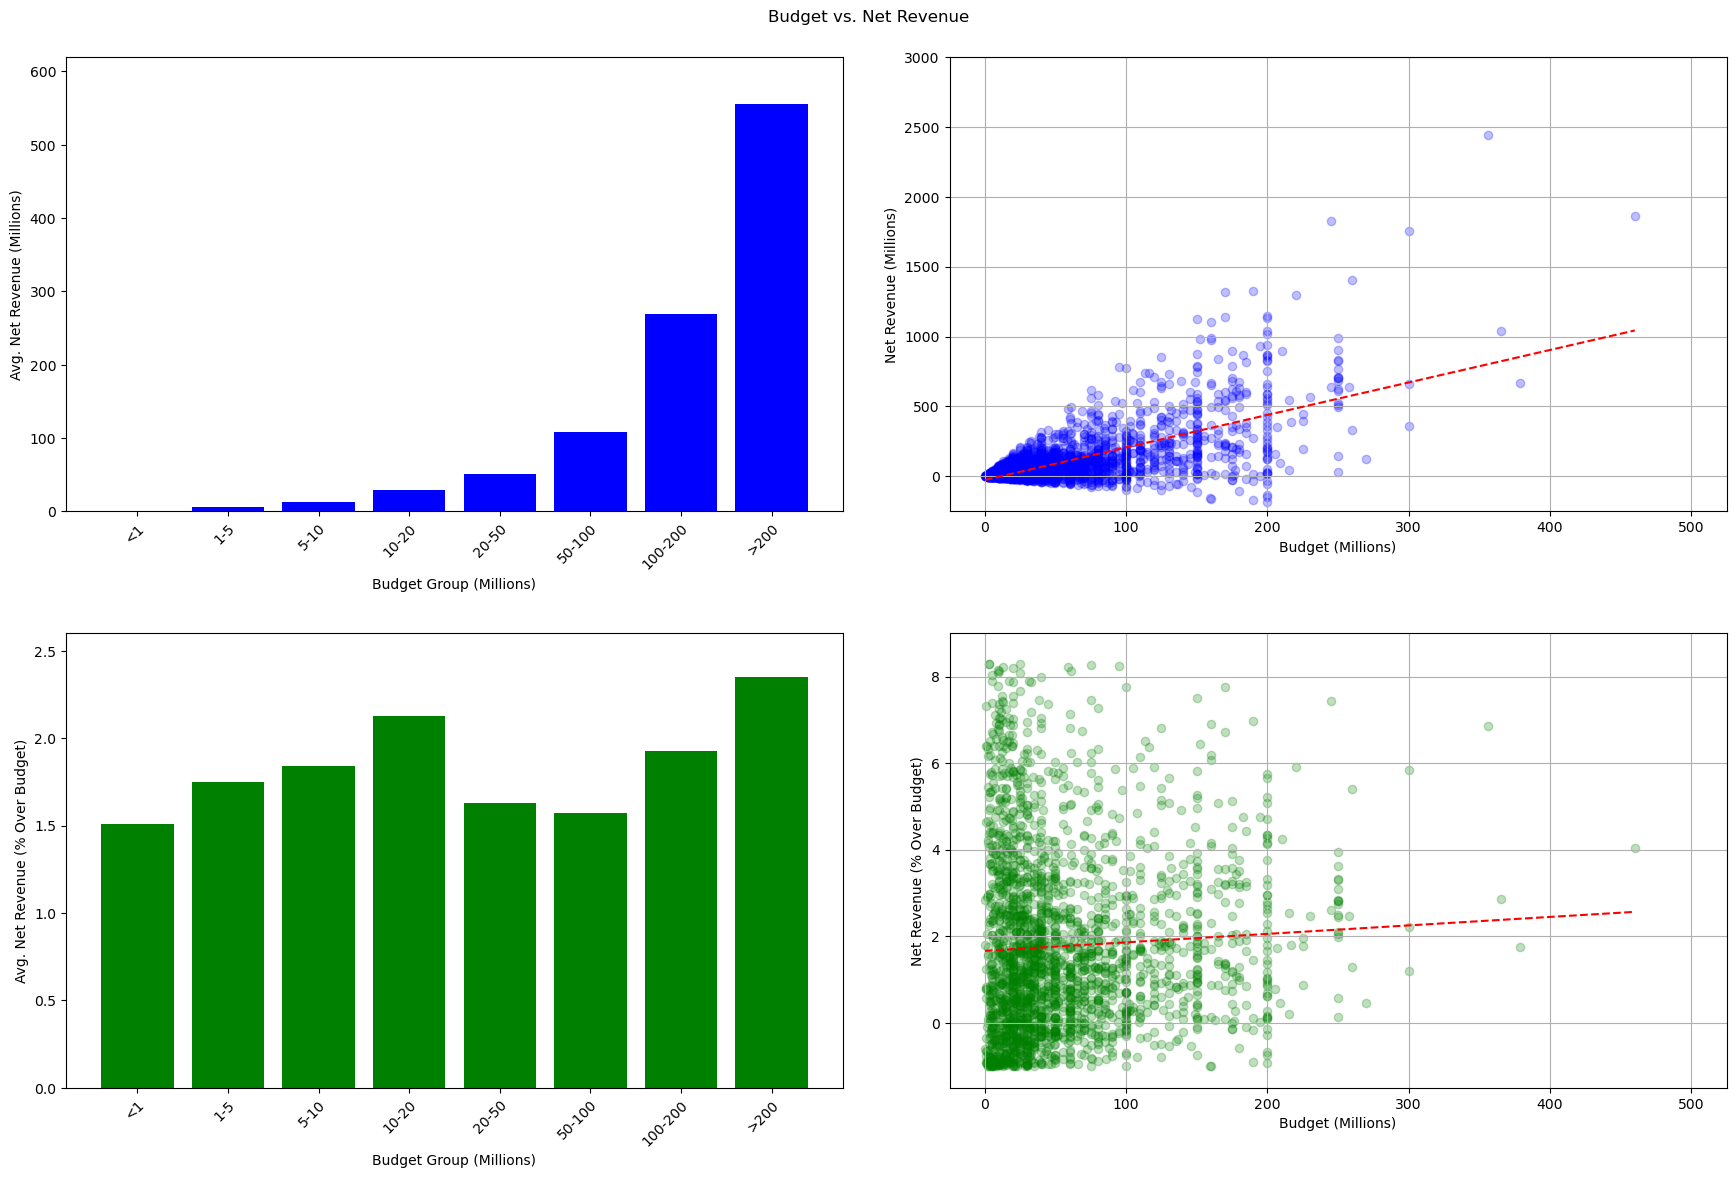

In [20]:
# set up plot layout
fig, axs = plt.subplots(2,2)

# FOR SOME REASON YOU HAVE TO RUN THIS A FEW TIMES FOR IT TO ACTUALLY UPDATE THE DIMENSIONS

# graphs relating budget directly to net revenue - - - - - - - - - - - - - - - - - - - - - - - - - 
mean_net_x = range(1, len(mean_profit_df.index) + 1, 1)
mean_labels = mean_profit_df.index
mean_net_y = mean_profit_df['Net Revenue'] / 1000000
net_x = profit_df['Budget'] / 1000000
net_y = profit_df['Net Revenue'] / 1000000

# plot mean
axs[0, 0].bar(mean_net_x, mean_net_y,
              color = 'b',
              align = 'center')
axs[0, 0].set_xticks(mean_net_x)
axs[0, 0].set_xticklabels(mean_labels,
                          rotation = 45,
                          rotation_mode = 'anchor',
                          ha = 'right')
axs[0, 0].set_xlabel('Budget Group (Millions)')
axs[0, 0].set_ylabel('Avg. Net Revenue (Millions)')
axs[0, 0].set_ylim(0, 620)

# plot overall
axs[0, 1].scatter(net_x, net_y,
                  color = 'b',
                  alpha = .25)
axs[0, 1].grid(visible = True)
axs[0, 1].set_xlabel('Budget (Millions)')
axs[0, 1].set_ylabel('Net Revenue (Millions)')
axs[0, 1].set_xlim(-25, 525)
axs[0, 1].set_ylim(-250, 3000)
# line of regression
net_slope, net_intercept, net_rvalue, net_pvalue, net_stderr = st.linregress(net_x, net_y)
net_reg = net_x * net_slope + net_intercept
axs[0, 1].plot(net_x, net_reg,'r--')

# graphs relating budget to revenue % - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
mean_netper_y = mean_profit_df['Net Revenue (% Over Budget)']
netper_y = profit_df['Net Revenue (% Over Budget)']

# plot mean
axs[1, 0].bar(mean_net_x, mean_netper_y,
              color = 'g',
              align = 'center')
axs[1, 0].set_xticks(mean_net_x)
axs[1, 0].set_xticklabels(mean_labels,
                          rotation = 45,
                          rotation_mode = 'anchor',
                          ha = 'right')
axs[1, 0].set_xlabel('Budget Group (Millions)')
axs[1, 0].set_ylabel('Avg. Net Revenue (% Over Budget)')
axs[1, 0].set_ylim(0, 2.6)

# plot overall
axs[1, 1].scatter(net_x, netper_y,
                  color = 'g',
                  alpha = .25)
axs[1, 1].grid(visible = True)
axs[1, 1].set_xlabel('Budget (Millions)')
axs[1, 1].set_ylabel('Net Revenue (% Over Budget)')
axs[1, 1].set_xlim(-25, 525)
# line of regression
netper_slope, netper_intercept, netper_rvalue, netper_pvalue, netper_stderr = st.linregress(net_x, netper_y)
netper_reg = net_x * netper_slope + netper_intercept
axs[1, 1].plot(net_x, netper_reg,'r--')
axs[1, 1].set_ylim(-1.5, 9)

plt.rcParams['figure.figsize'] = [18, 12]
fig.tight_layout(pad = 3)
plt.suptitle('Budget vs. Net Revenue', y = 1)
plt.savefig('../../Analysis/Visualizations/rev_by_budget.png')
fig.show()

In [11]:
# Q2 Franchise or comic-based movies revenue performance vs non-franchise movie
#Ideas:
    # Create a group for top 10-20 comic-based movies and get the average revenue in the last 15 years vs. top 10-20 non-franchise movies
    # Create a graph that shows the difference between the data above
    # Is the highest grossing movie a franchise/comic-based?
    # In the top 100 movies, how many movies are franchise/comic-based?

In [12]:
# get top 100 movies
top_100_df = movie_df.sort_values('Net Revenue', ascending = False).iloc[0:100,:]
top_profit_df = top_100_df[['Title','Gross Revenue','Net Revenue','Net Revenue (% Over Budget)','Budget','Release Year']]
top_profit_df.head()

,Title,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Year
854,Avatar,2923706026,2686706026,11.336312,237000000,2009
2133,Avengers: Endgame,2794731755,2438731755,6.850370,356000000,2019
2405,Avatar: The Way of Water,2320250281,1860250281,4.044022,460000000,2022
1606,Star Wars: The Force Awakens,2068223624,1823223624,7.441729,245000000,2015
2004,Avengers: Infinity War,2052415039,1752415039,5.841383,300000000,2018


In [13]:
# manually check and add column for comic book, other franchise, etc
# some notes:
    # first movies in a franchise (Avatar, for example), will not be considered franchise
    # remakes, sequels, prequels, and spinoffs all count as franchises
    # adaptations of a book / other form of media will not be considered a franchise unless there has already been at least 1 movie
    
# top_profit_df.to_csv('../Cleaned Data/top_100_temp.csv')

top_profit_df['Franchise Status'] = ['Not a Franchise','Comic / Superhero','Franchise','Franchise','Comic / Superhero','Comic / Superhero','Franchise','Not a Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Comic / Superhero','Franchise','Franchise','Not a Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Comic / Superhero','Comic / Superhero','Comic / Superhero','Franchise','Comic / Superhero','Comic / Superhero','Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Franchise','Franchise','Not a Franchise','Franchise','Franchise','Franchise','Franchise','Franchise','Not a Franchise','Franchise','Franchise','Not a Franchise','Franchise','Comic / Superhero','Franchise','Franchise','Franchise','Comic / Superhero','Not a Franchise','Franchise','Franchise','Franchise','Franchise','Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Comic / Superhero','Franchise','Franchise','Comic / Superhero','Not a Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Franchise','Comic / Superhero','Not a Franchise','Franchise','Comic / Superhero','Comic / Superhero','Comic / Superhero','Franchise','Not a Franchise','Comic / Superhero','Franchise','Franchise','Franchise','Franchise','Franchise','Not a Franchise','Comic / Superhero','Franchise','Franchise','Franchise','Franchise','Franchise','Not a Franchise','Comic / Superhero','Not a Franchise','Not a Franchise','Franchise']

top_profit_df

C:\Users\Peter Solis\AppData\Local\Temp\ipykernel_1052\3581006638.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_profit_df['Franchise Status'] = ['Not a Franchise','Comic / Superhero','Franchise','Franchise','Comic / Superhero','Comic / Superhero','Franchise','Not a Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Comic / Superhero','Franchise','Franchise','Not a Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Comic / Superhero','Comic / Superhero','Comic / Superhero','Franchise','Comic / Superhero','Comic / Superhero','Franchise','Franchise','Franchise','Franchise','Comic / Superhero','Franchise','Franchise','Franchise','Not a Franchise','Franchise','Franchise','Franchise','

,Title,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Year,Franchise Status
854,Avatar,2923706026,2686706026,11.336312,237000000,2009,Not a Franchise
2133,Avengers: Endgame,2794731755,2438731755,6.850370,356000000,2019,Comic / Superhero
2405,Avatar: The Way of Water,2320250281,1860250281,4.044022,460000000,2022,Franchise
1606,Star Wars: The Force Awakens,2068223624,1823223624,7.441729,245000000,2015,Franchise
2004,Avengers: Infinity War,2052415039,1752415039,5.841383,300000000,2018,Comic / Superhero
...,...,...,...,...,...,...,...
1865,Coco,800526015,625526015,3.574434,175000000,2017,Not a Franchise
1717,Batman v Superman: Dawn of Justice,873637528,623637528,2.494550,250000000,2016,Comic / Superhero
1251,The Hunger Games,694394724,619394724,8.258596,75000000,2012,Not a Franchise
1395,Gravity,723192705,618192705,5.887550,105000000,2013,Not a Franchise


In [14]:
# get counts
franchise_counts = top_profit_df['Franchise Status'].value_counts()
# worth noting - of the 14 non-franchise movies:
    # 8 spawned movie franchises
    # 2 were direct adaptations of established series
    # 1 has a confirmed sequel upcoming
    
# get sorted averages
grouped_top_df = top_profit_df.groupby('Franchise Status')
avg_top_df = grouped_top_df[['Net Revenue (% Over Budget)', 'Net Revenue', 'Gross Revenue', 'Budget']].mean(numeric_only = True).sort_values(['Net Revenue (% Over Budget)', 'Net Revenue', 'Gross Revenue'], ascending = False)
avg_top_df

,Net Revenue (% Over Budget),Net Revenue,Gross Revenue,Budget
Franchise Status,,,,
Not a Franchise,9.511568,9.402249e+08,1.072582e+09,1.323571e+08
Franchise,6.297213,8.858075e+08,1.055430e+09,1.696230e+08
Comic / Superhero,5.750685,9.794280e+08,1.174948e+09,1.955200e+08


C:\Users\Peter Solis\AppData\Local\Temp\ipykernel_1052\3663977181.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


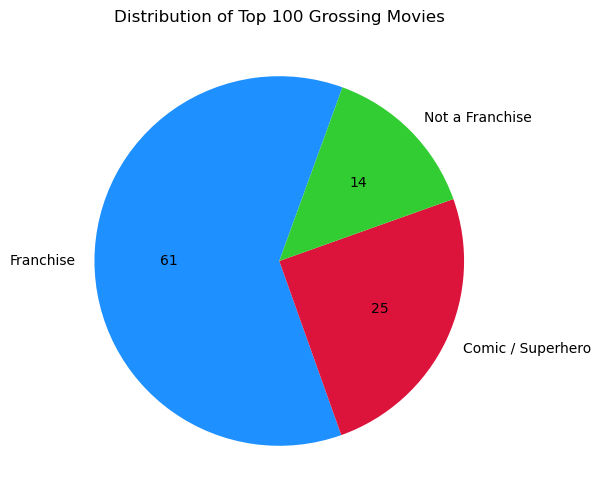

In [16]:
# pie showing distribution

# FOR SOME REASON YOU HAVE TO RUN THIS A FEW TIMES FOR IT TO ACTUALLY UPDATE THE DIMENSIONS

plt.pie(franchise_counts,
        labels = franchise_counts.index,
        colors = ['dodgerblue','crimson','limegreen'],
        autopct = '%.0f',
        startangle = 70)
plt.title('Distribution of Top 100 Grossing Movies')
plt.rcParams['figure.figsize'] = [8, 6]

plt.savefig('../../Analysis/Visualizations/top_grossing_by_franchise.png')
fig.show()